In [73]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [74]:
!kaggle datasets download -d salader/dogs-vs-cats
!unzip -qq dogs-vs-cats.zip

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
User cancelled operation
replace dogs_vs_cats/test/cats/cat.10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

### MAKING GENERATORS

In [76]:
df_train=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

df_test=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


OUR MODEL EXPECTS IMAGES OF SAME SIZE BUT ACTUALLY THEY ARE DIFFERENT AND HENCE `imag_size` MAKES THEM UNIFORM

### NORMALIZING

In [77]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

df_train = df_train.map(process)
df_test = df_test.map(process)

CHANGING THE VALUES IN THE IMAGES PIXELS TO 0-1 GIVES BETTER RESULTS

In [94]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [80]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(df_train,epochs=10,validation_data=df_test)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 100ms/step - accuracy: 0.5363 - loss: 3.7425 - val_accuracy: 0.5384 - val_loss: 0.6807
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.5500 - loss: 0.6839 - val_accuracy: 0.5666 - val_loss: 0.6683
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.5617 - loss: 0.6749 - val_accuracy: 0.5446 - val_loss: 0.6782
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.5763 - loss: 0.6698 - val_accuracy: 0.5554 - val_loss: 0.7021
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.5828 - loss: 0.6721 - val_accuracy: 0.6190 - val_loss: 0.6378
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.6560 - loss: 0.6208 - val_accuracy: 0.7168 - val_loss: 0.5790
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.7161 - loss: 0.5652 - val_accuracy: 0.6380 - val_loss: 0.6348
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.7481 - loss: 0.5300 -

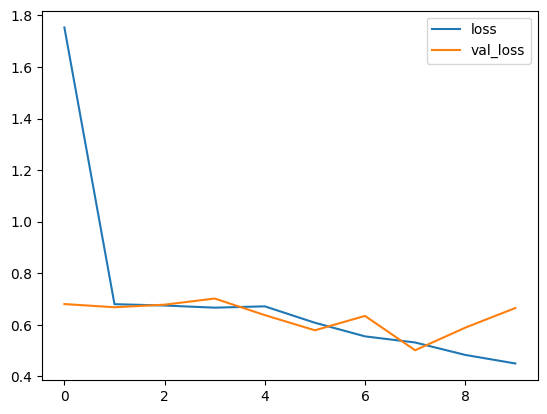

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [82]:
test1=cv2.imread('/content/FELV-cat.jpg')
test2=cv2.imread('/content/Golden-Retriever.jpg')
test3=cv2.imread('/content/dataset-card.jpeg')
test4=cv2.imread('/content/dog.jpg')
test5=cv2.imread('/content/dog2.jpg')

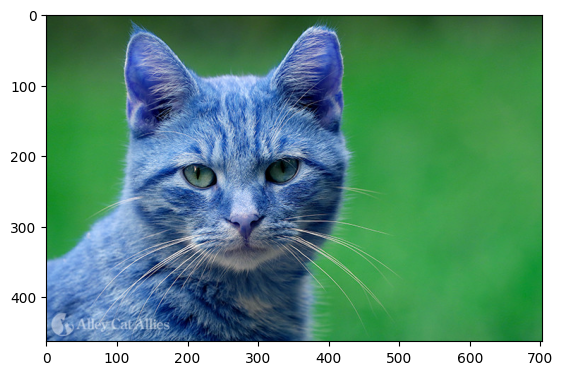

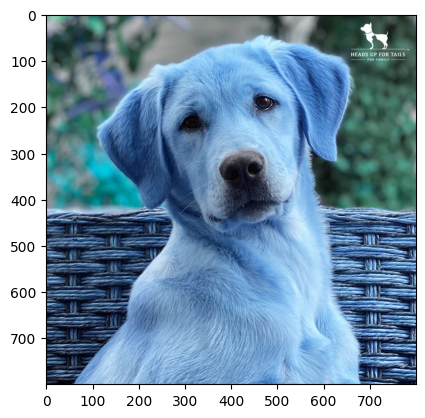

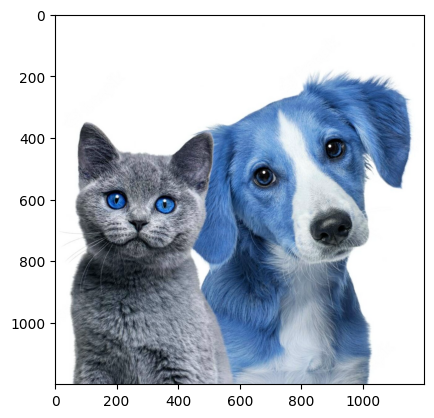

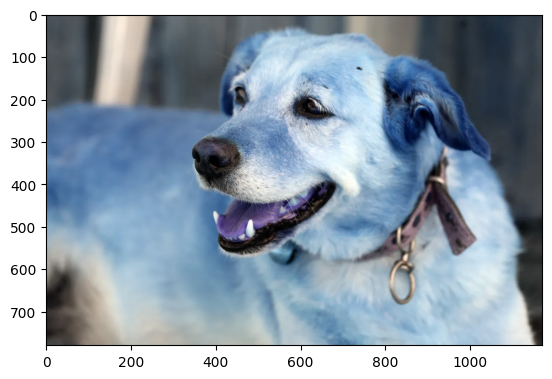

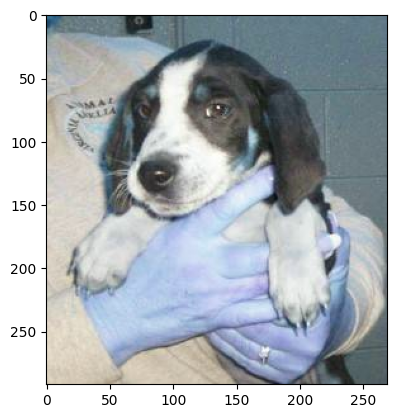

In [83]:
plt.imshow(test1)
plt.show()
plt.imshow(test2)
plt.show()
plt.imshow(test3)
plt.show()
plt.imshow(test4)
plt.show()
plt.imshow(test5)
plt.show()

In [84]:
test1.shape

(463, 703, 3)

In [91]:
test1=cv2.resize(test1,(256,256))
test2=cv2.resize(test2,(256,256))
test3=cv2.resize(test3,(256,256))
test4=cv2.resize(test4,(256,256))
test5=cv2.resize(test5,(256,256))

In [92]:
test_input1=test1.reshape((1,256,256,3))
test_input2=test1.reshape((1,256,256,3))
test_input3=test1.reshape((1,256,256,3))
test_input4=test1.reshape((1,256,256,3))
test_input5=test1.reshape((1,256,256,3))

In [93]:
model.predict(test_input1),model.predict(test_input2),model.predict(test_input3),model.predict(test_input4),model.predict(test_input5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


(array([[0.17659463]], dtype=float32),
 array([[0.17659463]], dtype=float32),
 array([[0.17659463]], dtype=float32),
 array([[0.17659463]], dtype=float32),
 array([[0.17659463]], dtype=float32))